In [32]:
# 参考資料P324~328
# 決定木の学習直線がどのようなものになるかを確認するために、
# scikit-learnのDecisionTreeRegressorクラスを使って、MEDV変数とLSTAT変数の非線形関係をモデル化する

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import sys
sys.path.append('/home/yoshida/.pyenv/versions/3.6.6/lib/python3.6/site-packages')
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score # R^2(決定係数)のスコアを出力
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split # データをトレーニング用とテスト用に分割するためのライブラリ
from sklearn.metrics import mean_squared_error

In [33]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')
#「sep = \s+」は、もとのデータの区切りがスペースであり、スペースが複数個続いていることを示している
df.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PIRATIO','B','LSTAT','MEDV']
#カラムの名前を指定
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [34]:
# 回帰のグラフがトレーニングデータにどれだけ適合しているのかを可視化する「lin_regplot関数」を定義する
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    return

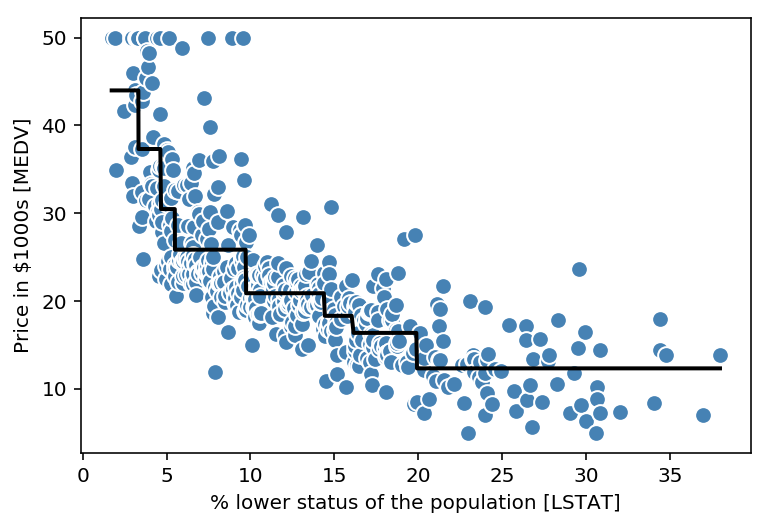

In [35]:
X = df[['LSTAT']].values
y = df['MEDV'].values

# 決定木の回帰モデルのクラスをインスタンス化：max_depthで決定木の深さを指定
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)

# argsortはソート後のインデックスを返し，flattenは1次元の配列を返す
sort_idx = X.flatten().argsort()

lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()

In [38]:
X_data = df.iloc[:, :-1].values
y_data = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.4, random_state=1)

forest = RandomForestRegressor(n_estimators=1000,
                               criterion='mse',
                               random_state=1,
                               n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

# MSE(平均二乗誤差)を出力
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),
                                       mean_squared_error(y_test, y_test_pred)))

print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),
                                       r2_score(y_test, y_test_pred)))

MSE train: 1.641, test: 11.056
R^2 train: 0.979, test: 0.878


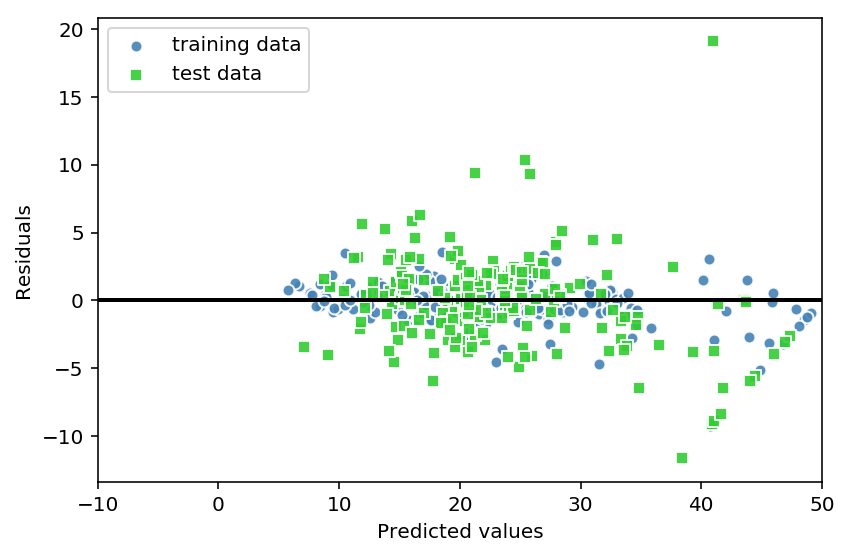

In [39]:
# 上記の結果からわかるように、ランダムフォレストは、トレーニングデータを過学習する傾向にあることがわかる
# 一方で、目的変数と説明変数の関係は、依然として上手く説明できている(testで、R^2=0.878)
# 以下では、予測値の残差を調べる
plt.scatter(y_train_pred, # グラフのx軸(予測値)
            y_train_pred - y_train, # グラフのy軸(予測値とトレーニング値の差)
            c='steelblue', # プロットの色
            edgecolor='white', # プロット線の色
            marker='o', # マーカーの種類
            s=35, # マーカーのサイズ
            alpha=0.9, # 透過度
            label='training data') # ラベルの文字

plt.scatter(y_test_pred, # グラフのx軸(予測値)
            y_test_pred - y_test, # グラフのy軸(予測値とトレーニング値の差)
            c='limegreen', # プロットの色
            edgecolor='white', # プロット線の色
            marker='s', # マーカーの種類
            s=35, # マーカーのサイズ
            alpha=0.9, # 透過度
            label='test data') # ラベルの文字

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='black')
plt.xlim([-10, 50])
plt.tight_layout()
plt.show()